# Titanic: Machine Learning from Disaster

### Lu Wang

## Introduction

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this project, we apply machine learning tools to predict which passengers survived the tragedy. In Section 2 and 3, we provide a brief summary of the data and also visulaize the features. In Section 4, we drop the features that we don't need, complete features with missing values, create and convert features as needed.  We then consider different machine learning models to predict survival and compare their perfomances in Section 5. Finally, we conclude the project and make our suggestions in Section 6.

## Summary of Data

The variables in the dataset are as follow:

|Variable|	Definition|	Key|
|--------|------------|------
|survival|	Survival  |0 = No, 1 = Yes|
|pclass	|Ticket class|	1 = 1st, 2 = 2nd, 3 = 3rd|
|sex	|Sex	| |
|Age	|Age in years| |
|sibsp	|# of siblings / spouses aboard the Titanic| |
|parch	|# of parents / children aboard the Titanic	| |
|ticket	|Ticket number| |
|fare	|Passenger fare| |
|cabin	|Cabin number| |
|embarked	|Port of Embarkation|	C = Cherbourg, Q = Queenstown, S = Southampton|

In [1]:
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier

Note that in the original project, the test set 'test.scv' doesn't contain the dependent variable Survived. Thus in our analysis, we split the dataset 'train.csv' (the training set of the original project) into test and training sets, and evaluate the performance of different models.

Now let's observe the first few rows: 

In [2]:
dataset = pd.read_csv('train.csv')
from sklearn.cross_validation import train_test_split
train_data, test_data = train_test_split(dataset, test_size = 0.25, random_state = 0)

train_data.head()

/Users/luwang/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
105,106,0,3,"Mionoff, Mr. Stoytcho",male,28.0,0,0,349207,7.8958,NaN,S
68,69,1,3,"Andersson, Miss. Erna Alexandra",female,17.0,4,2,3101281,7.9250,NaN,S
253,254,0,3,"Lobb, Mr. William Arthur",male,30.0,1,0,A/5. 3336,16.1000,NaN,S
320,321,0,3,"Dennis, Mr. Samuel",male,22.0,0,0,A/5 21172,7.2500,NaN,S
706,707,1,2,"Kelly, Mrs. Florence ""Fannie""",female,45.0,0,0,223596,13.5000,NaN,S


In [3]:
train_data.info()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 668 entries, 105 to 684
Data columns (total 12 columns):
PassengerId    668 non-null int64
Survived       668 non-null int64
Pclass         668 non-null int64
Name           668 non-null object
Sex            668 non-null object
Age            535 non-null float64
SibSp          668 non-null int64
Parch          668 non-null int64
Ticket         668 non-null object
Fare           668 non-null float64
Cabin          157 non-null object
Embarked       666 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 67.8+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 223 entries, 495 to 10
Data columns (total 12 columns):
PassengerId    223 non-null int64
Survived       223 non-null int64
Pclass         223 non-null int64
Name           223 non-null object
Sex            223 non-null object
Age            179 non-null float64
SibSp          223 non-null int64
Parch          223 non-null int64
Ticket         223 non-null obj

We can see that there are four categorical features: Survived, Sex, Embarked and Pclass, where Pclass is also an ordinal feature.

Numerical features are Age, SibSp, Parch and Fare, where Age and Fare are continuous, SibSp and Parch are discrete.

Ticket is a mix of numeric and alphanumeric data types. Cabin is alphanumeric.

In training set, there are missing values for features Age, Cabin and Embarked. In test set, features Age and Cabin have missing values. 

### Distribution of numerical features

In [4]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,668.000000,668.000000,668.000000,535.000000,668.000000,668.000000,668.000000
mean,445.911677,0.386228,2.305389,29.900000,0.534431,0.392216,32.373621
std,259.966783,0.487249,0.837377,14.487993,1.161739,0.822509,50.632021
min,1.000000,0.000000,1.000000,0.670000,0.000000,0.000000,0.000000
25%,216.250000,0.000000,2.000000,21.000000,0.000000,0.000000,7.925000
50%,445.500000,0.000000,3.000000,29.000000,0.000000,0.000000,14.500000
75%,674.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.275000
max,890.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Obeservations: 

 1. 38.6% passengers in the training set survived.
 2. There are few old passengers (<25%), since the 75% quantile is 38. 
 3. Over 75% passengers didn't travel with their parents or children.
 4. Fares varies a lot among passengers. 

### Distribution of categorical features

In [310]:
train_data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,668,668,668,157,666
unique,668,2,538,123,3
top,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",male,CA. 2343,B96 B98,S
freq,1,437,7,3,490


Obeservations:

 1. 65.4% passengers in the training set were male, 34.6% were female.
 2. Embarked takes three values, the most frequent one is S.
 3. Some passengers shared the cabins.

## Visualizing data

### Sex

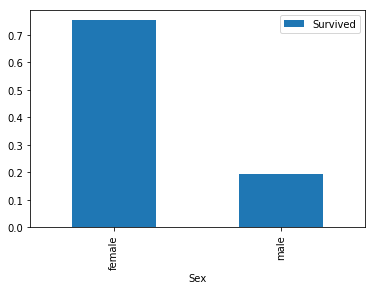

In [5]:
# survival rates of male and female
train_data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar()

Sex correlates with Survived: Sex = female had much higher survival rate.

### Pclass

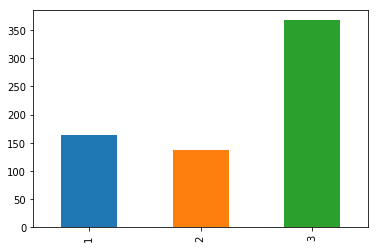

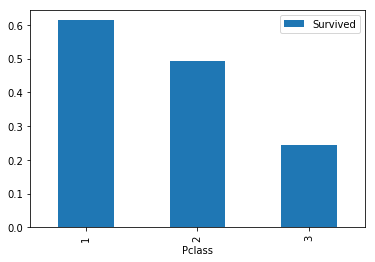

In [6]:
# histogram of Pclass and the survival rates of each class
train_data['Pclass'].value_counts()[[1,2,3]].plot(kind='bar')
train_data[['Pclass','Survived']].groupby(['Pclass']).mean().plot.bar()

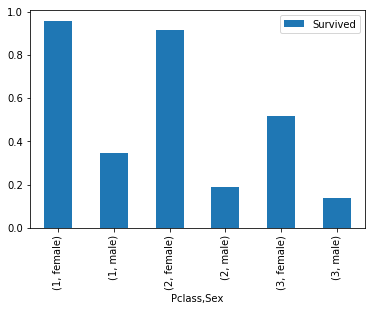

In [7]:
train_data[['Sex','Pclass','Survived']].groupby(['Pclass','Sex']).mean().plot.bar()

1. Pclass = 3 has most passengers but has lowest survival rate. 
2. Pclass = 1 has the highest survival rate.
3. Pclass varies in terms of Sex distribution of passengers.

### Embarked

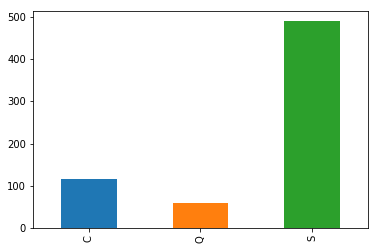

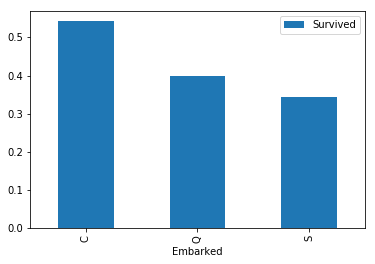

In [8]:
# histogram of Embarked and the survival rates of each class
train_data['Embarked'].value_counts()[['C','Q','S']].plot(kind='bar')
train_data[['Embarked','Survived']].groupby(['Embarked']).mean().plot.bar()

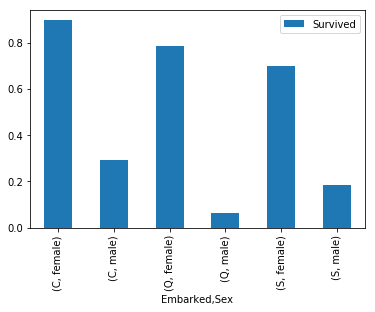

In [9]:
train_data[['Sex','Embarked','Survived']].groupby(['Embarked','Sex']).mean().plot.bar()

1. Embarked correlates with Survived, Embarked = S has most passengers but also has the lowest survival rate.
2. Embarked varies in terms of Sex distribution of passengers.
3. Survival rate of Embarked varies among male passengers, and Embarked = Q has the lowest survival rate.

### Age

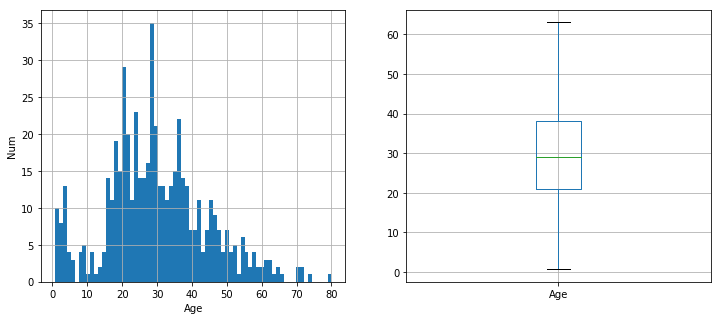

In [10]:
# distribution of Age 
plt.figure(figsize=(12,5))
plt.subplot(121)
train_data['Age'].hist(bins=70)
plt.xlabel('Age')
plt.ylabel('Num')

plt.subplot(122)
train_data.boxplot(column='Age', showfliers=False)
plt.show()

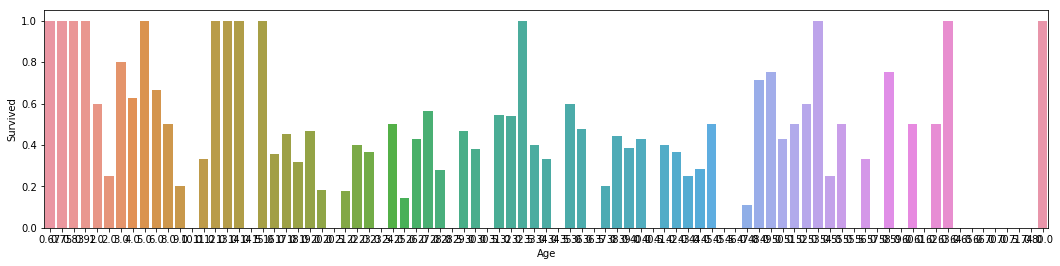

In [11]:
# survival rate by age
fig, axis1 = plt.subplots(1,1,figsize=(18,4))
average_age = train_data[["Age", "Survived"]].groupby(['Age'],as_index=False).mean()
sns.barplot(x='Age', y='Survived', data=average_age)

We divide the age into four groups: (0,12] = children, (12,18] = teenagers, (18,65] = adults, (65,100] = old people.

In this case, the survival rate by age group is:

In [12]:
bins = [0, 12, 18, 65, 100]
train_data['Age_group'] = pd.cut(train_data['Age'], bins)
by_age = train_data.groupby('Age_group')['Survived'].mean()
by_age

/Users/luwang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Age_group
(0, 12]      0.576923
(12, 18]     0.431373
(18, 65]     0.390588
(65, 100]    0.142857
Name: Survived, dtype: float64

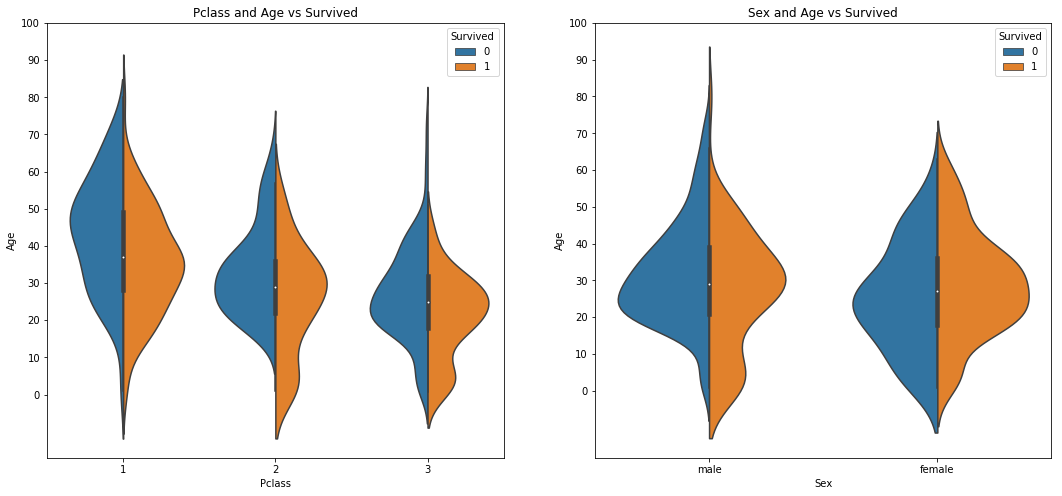

In [13]:
fig, ax = plt.subplots(1, 2, figsize = (18, 8))
sns.violinplot("Pclass", "Age", hue="Survived", data=train_data, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))

sns.violinplot("Sex", "Age", hue="Survived", data=train_data, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))

plt.show()

1. From the boxplot, we see that most passengers are between 20 and 40 years old.
2. Children and very old passengers have high survival rates.
3. Many passengers between 20 and 40 did not survive.
4. Age distribution varies with Pclass and Sex.

### Fare 

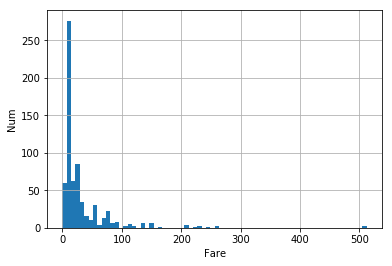

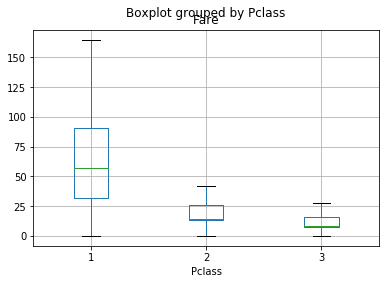

In [14]:
# distribution of Fare 
train_data['Fare'].hist(bins=70)
plt.xlabel('Fare')
plt.ylabel('Num')

# boxplot of Fare for different Pclass
train_data.boxplot(column='Fare', by = 'Pclass', showfliers=False)
plt.show()

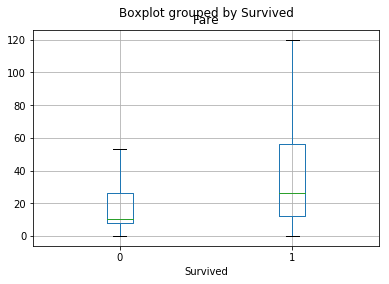

In [15]:
# boxplot of Fare for passengers survived and not survived
train_data.boxplot(column='Fare', by = 'Survived', showfliers=False)
plt.show()

1. Survived passengers paid higher fares.
2. Fares are different for different Pclass: Pclass = 1 paid much higher fares compared to the other two classes.

### Sibsp

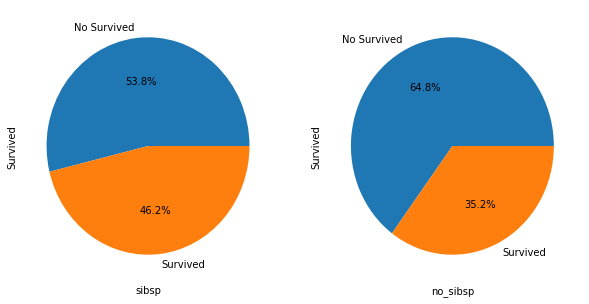

In [16]:
# survival rates of passengers with or without Sibsp.
sibsp_df = train_data[train_data['SibSp'] != 0]
no_sibsp_df = train_data[train_data['SibSp'] == 0]

plt.figure(figsize=(10,5))
plt.subplot(121)
sibsp_df['Survived'].value_counts().plot.pie(labels=['No Survived', 'Survived'], autopct = '%1.1f%%')
plt.xlabel('sibsp')

plt.subplot(122)
no_sibsp_df['Survived'].value_counts().plot.pie(labels=['No Survived', 'Survived'], autopct = '%1.1f%%')
plt.xlabel('no_sibsp')

plt.show()

Passengers with siblings or spouses aboard are more likely to survive.

### Parch 

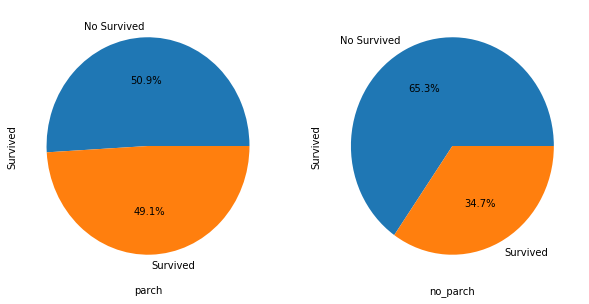

In [17]:
# survival rates of passengers with or without Parch.
parch_df = train_data[train_data['Parch'] != 0]
no_parch_df = train_data[train_data['Parch'] == 0]

plt.figure(figsize=(10,5))
plt.subplot(121)
parch_df['Survived'].value_counts().plot.pie(labels=['No Survived', 'Survived'], autopct = '%1.1f%%')
plt.xlabel('parch')

plt.subplot(122)
no_parch_df['Survived'].value_counts().plot.pie(labels=['No Survived', 'Survived'], autopct = '%1.1f%%')
plt.xlabel('no_parch')

plt.show()

Passengers who had parents or childern aboard had higher survival rate.

## Dropping, creating, completing and converting features

### PassengerId, Ticket and Cabin

In the analysis, we can drop the features PassengerId, Ticket and Cabin, since PassengerId and Ticket don't contribute to survival, and Cabin has too many missing values. 

In [18]:
train_data = train_data.drop(['Ticket', 'Cabin', 'PassengerId'], axis=1)
test_data = test_data.drop(['Ticket', 'Cabin', 'PassengerId'], axis=1)
combined_data = [train_data, test_data]
train_data.shape, test_data.shape

((668, 10), (223, 9))

### Parch and Sibsp

We can combine Parch and Sibsp to create a new feature Family_Size.

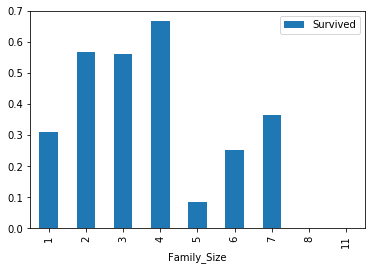

In [19]:
# compute the family size of each passenger by adding Parch and Sibsp
for data in combined_data:
    data['Family_Size'] = data['Parch'] + data['SibSp'] + 1
train_data[['Family_Size','Survived']].groupby(['Family_Size']).mean().plot.bar()

We can see that passengers with 2 - 4 family members were more likely to survive.

Also, create a categorical variable Family_Size_Category and use label encoding.

In [20]:
def family_size_category(family_size):
    if family_size <= 1:
        return 'Single'
    elif family_size <= 4:
        return 'Small_Family'
    else:
        return 'Large_Family'
for data in combined_data:    
    data['Family_Size_Category'] = data['Family_Size'].map(family_size_category)

# drop Parch, Sibsp
for data in combined_data:
    data.drop(['Parch', 'SibSp', 'Family_Size'],axis=1,inplace=True)

train_data.head() 

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Age_group,Family_Size_Category
105,0,3,"Mionoff, Mr. Stoytcho",male,28.0,7.8958,S,"(18, 65]",Single
68,1,3,"Andersson, Miss. Erna Alexandra",female,17.0,7.9250,S,"(12, 18]",Large_Family
253,0,3,"Lobb, Mr. William Arthur",male,30.0,16.1000,S,"(18, 65]",Small_Family
320,0,3,"Dennis, Mr. Samuel",male,22.0,7.2500,S,"(18, 65]",Single
706,1,2,"Kelly, Mrs. Florence ""Fannie""",female,45.0,13.5000,S,"(18, 65]",Single


In [21]:
# convert Family_Size_Category into a numeric feature
for data in combined_data:
    data['Family_Size_Category'] = data['Family_Size_Category'].map( {'Single': 0, 'Small_Family': 1, 'Large_Family': 2} ).astype(int)

train_data.head()

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Age_group,Family_Size_Category
105,0,3,"Mionoff, Mr. Stoytcho",male,28.0,7.8958,S,"(18, 65]",0
68,1,3,"Andersson, Miss. Erna Alexandra",female,17.0,7.9250,S,"(12, 18]",2
253,0,3,"Lobb, Mr. William Arthur",male,30.0,16.1000,S,"(18, 65]",1
320,0,3,"Dennis, Mr. Samuel",male,22.0,7.2500,S,"(18, 65]",0
706,1,2,"Kelly, Mrs. Florence ""Fannie""",female,45.0,13.5000,S,"(18, 65]",0


### Title

We can extract the feature Title from Name, and look at its correlation bewteen survival rate. 

In [22]:
for data in combined_data:
    data['Title'] = data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
pd.crosstab(train_data['Title'], train_data['Sex'])

Sex,female,male
Title,,
Capt,0,1
Countess,1,0
Dr,0,3
Lady,1,0
Major,0,2
Master,0,33
Miss,132,0
Mlle,2,0
Mme,1,0


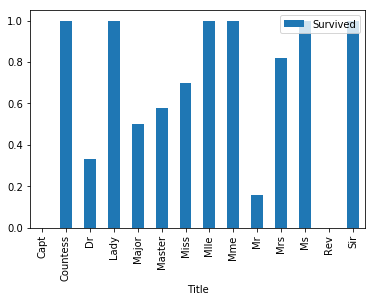

In [23]:
train_data[['Title','Survived']].groupby(['Title']).mean().plot.bar()

We can see that some titles such as Countess, Lady, Ms, Mlle have survival rate 1.

We then divide the titles into several title groups, and look at the survival rate by title group.

In [24]:
for data in combined_data:
    data['Title'] = data['Title'].replace(['Capt', 'Col', 'Major', 'Dr', 'Rev', 'Don', 'Sir', 'Countess', 'Dona', 'Lady', 'Jonkheer'], 'Other')
    data['Title'] = data['Title'].replace('Mme', 'Mrs')
    data['Title'] = data['Title'].replace(['Mlle', 'Ms'], 'Miss')
    
train_data[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575758
1,Miss,0.703704
2,Mr,0.157360
3,Mrs,0.819149
4,Other,0.416667


In [25]:
# now we can drop the feature Name
for data in combined_data:
    data.drop(['Name'],axis=1,inplace=True)
train_data.head()  

,Survived,Pclass,Sex,Age,Fare,Embarked,Age_group,Family_Size_Category,Title
105,0,3,male,28.0,7.8958,S,"(18, 65]",0,Mr
68,1,3,female,17.0,7.9250,S,"(12, 18]",2,Miss
253,0,3,male,30.0,16.1000,S,"(18, 65]",1,Mr
320,0,3,male,22.0,7.2500,S,"(18, 65]",0,Mr
706,1,2,female,45.0,13.5000,S,"(18, 65]",0,Mrs


In [26]:
# label encoding
for data in combined_data:
    data['Title'] = data['Title'].map( {'Mr': 0, 'Other': 1, 'Master': 2, 'Miss': 3, 'Mrs':4} ).astype(int)

train_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Age_group,Family_Size_Category,Title
105,0,3,male,28.0,7.8958,S,"(18, 65]",0,0
68,1,3,female,17.0,7.9250,S,"(12, 18]",2,3
253,0,3,male,30.0,16.1000,S,"(18, 65]",1,0
320,0,3,male,22.0,7.2500,S,"(18, 65]",0,0
706,1,2,female,45.0,13.5000,S,"(18, 65]",0,4


### Embarked

Since there are only two missing values for Embarked in the training set, we can use the mode for missing values, and encode the feature.

In [27]:
train_data['Embarked'] = train_data['Embarked'].fillna(train_data.Embarked.dropna().mode()[0])

# convert it to a numeric feature
for data in combined_data:
    data['Embarked'] = data['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Age_group,Family_Size_Category,Title
105,0,3,male,28.0,7.8958,0,"(18, 65]",0,0
68,1,3,female,17.0,7.9250,0,"(12, 18]",2,3
253,0,3,male,30.0,16.1000,0,"(18, 65]",1,0
320,0,3,male,22.0,7.2500,0,"(18, 65]",0,0
706,1,2,female,45.0,13.5000,0,"(18, 65]",0,4


### Sex

We can also convert the feature Sex to a numeric feature: male = 0 and female = 1.

In [28]:
for data in combined_data:
    data['Sex'] = data['Sex'].map( {'male': 0, 'female': 1} ).astype(int)

train_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Age_group,Family_Size_Category,Title
105,0,3,0,28.0,7.8958,0,"(18, 65]",0,0
68,1,3,1,17.0,7.9250,0,"(12, 18]",2,3
253,0,3,0,30.0,16.1000,0,"(18, 65]",1,0
320,0,3,0,22.0,7.2500,0,"(18, 65]",0,0
706,1,2,1,45.0,13.5000,0,"(18, 65]",0,4


### Fare

For the feature Fare, we create a new feature Fare_Group and divide the Fare into 4 groups, and look at the survival rate by fare group.

In [29]:
train_data['Fare_Group'] = pd.qcut(train_data['Fare'], 4)
train_data.groupby('Fare_Group')['Survived'].mean()

Fare_Group
(-0.001, 7.925]      0.234973
(7.925, 14.5]        0.300654
(14.5, 31.275]       0.433735
(31.275, 512.329]    0.584337
Name: Survived, dtype: float64

In [30]:
# label encoding
for data in combined_data:
    data['Fare_Category'] = 0
    data.loc[(data['Fare'] > 7.925) & (data['Fare'] <= 14.5), 'Fare_Category'] = 1
    data.loc[(data['Fare'] > 14.5) & (data['Fare'] <= 31.275), 'Fare_Category']   = 2
    data.loc[ data['Fare'] > 31.275, 'Fare_Category'] = 3
    data['Fare_Category'] = data['Fare_Category'].astype(int)

train_data = train_data.drop(['Fare_Group', 'Fare'], axis=1)
test_data = test_data.drop(['Fare'], axis=1)
train_data.head()

,Survived,Pclass,Sex,Age,Embarked,Age_group,Family_Size_Category,Title,Fare_Category
105,0,3,0,28.0,0,"(18, 65]",0,0,0
68,1,3,1,17.0,0,"(12, 18]",2,3,0
253,0,3,0,30.0,0,"(18, 65]",1,0,2
320,0,3,0,22.0,0,"(18, 65]",0,0,0
706,1,2,1,45.0,0,"(18, 65]",0,4,1


### Age

There are many missing values for Age, so we cannot use the mode. We can build a random forest model to predict Age using other features, where the traning set is the dataset with known Age, and the test set is the observations with missing values. 

In [31]:
from sklearn import ensemble
from sklearn import model_selection
from sklearn.ensemble import RandomForestRegressor

def predict_age(data):
    data[data['Age'].isnull()]
    age_data = data[['Age', 'Embarked', 'Sex', 'Title', 'Family_Size_Category', 'Fare_Category', 'Pclass']]
    age_train = age_data[age_data['Age'].notnull()]
    age_test = age_data[age_data['Age'].isnull()]
    age_train_X = age_train.drop(['Age'], axis=1)
    age_train_Y = age_train['Age']
    age_test_X = age_test.drop(['Age'], axis=1)

    rf = RandomForestRegressor()
    param_grid = {'n_estimators': [200], 'max_depth': [5], 'random_state': [0]}
    rf_grid = model_selection.GridSearchCV(rf, param_grid, cv=10, n_jobs=25, verbose=1, scoring='neg_mean_squared_error')
    rf_grid.fit(age_train_X, age_train_Y)

    data.loc[(data.Age.isnull()), 'Age'] = rf_grid.predict(age_test_X)
    return data

train_data = predict_age(train_data)
test_data = predict_age(test_data)

train_data.info()
test_data.info()

Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=25)]: Done   5 out of  10 | elapsed:    1.2s remaining:    1.2s
[Parallel(n_jobs=25)]: Done  10 out of  10 | elapsed:    1.2s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=25)]: Done   5 out of  10 | elapsed:    0.8s remaining:    0.8s
[Parallel(n_jobs=25)]: Done  10 out of  10 | elapsed:    0.9s finished


<class 'pandas.core.frame.DataFrame'>
Int64Index: 668 entries, 105 to 684
Data columns (total 9 columns):
Survived                668 non-null int64
Pclass                  668 non-null int64
Sex                     668 non-null int64
Age                     668 non-null float64
Embarked                668 non-null int64
Age_group               535 non-null category
Family_Size_Category    668 non-null int64
Title                   668 non-null int64
Fare_Category           668 non-null int64
dtypes: category(1), float64(1), int64(7)
memory usage: 67.7 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 223 entries, 495 to 10
Data columns (total 8 columns):
Survived                223 non-null int64
Pclass                  223 non-null int64
Sex                     223 non-null int64
Age                     223 non-null float64
Embarked                223 non-null int64
Family_Size_Category    223 non-null int64
Title                   223 non-null int64
Fare_Category           223 no

As in Fare, we can now update the feature Age_group and encode it.

In [32]:
bins = [0, 12, 18, 65, 100]
train_data['Age_group'] = pd.cut(train_data['Age'], bins)
train_data.groupby('Age_group')['Survived'].mean()

Age_group
(0, 12]      0.537313
(12, 18]     0.423077
(18, 65]     0.367159
(65, 100]    0.142857
Name: Survived, dtype: float64

In [33]:
def age_category(data):
    data['Age_Category'] = 0
    data.loc[(data['Age'] > 12) & (data['Age'] <= 18), 'Age_Category'] = 1
    data.loc[(data['Age'] > 18) & (data['Age'] <= 65), 'Age_Category']   = 2
    data.loc[ data['Age'] > 65, 'Age_Category'] = 3
    data['Age_Category'] = data['Age_Category'].astype(int)
    return data

train_data = age_category(train_data)
test_data = age_category(test_data)
train_data = train_data.drop(['Age_group', 'Age'], axis=1)
test_data = test_data.drop(['Age'], axis=1)
train_data.head()

,Survived,Pclass,Sex,Embarked,Family_Size_Category,Title,Fare_Category,Age_Category
105,0,3,0,0,0,0,0,2
68,1,3,1,0,2,3,0,1
253,0,3,0,0,1,0,2,2
320,0,3,0,0,0,0,0,2
706,1,2,1,0,0,4,1,2


### Correlation plot

At the end of the section, we create a correlation plot which gives the correlation of every pair of features.

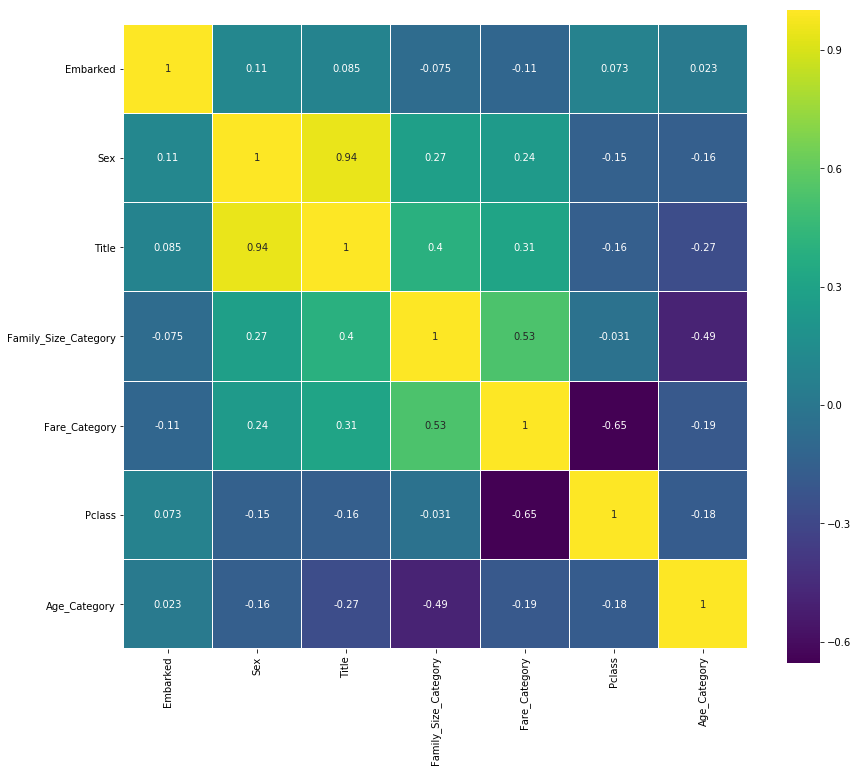

In [34]:
Correlation = pd.DataFrame(train_data[['Embarked', 'Sex', 'Title', 'Family_Size_Category', 'Fare_Category', 'Pclass','Age_Category']])
colormap = plt.cm.viridis
plt.figure(figsize=(14,12))
sns.heatmap(Correlation.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

## Models

Now we can build models to predict Survival, the features we use are Pclass, Sex, Embarked, Family_Size_Category, Title, Fare_Category, Age_Category. We compare the performances of different models, including
logistic regression, kNN, perceptron, SVM, decision tree, neural network, random forest, and gradient boosting. 

### Logistic Regression

The accuracy of logistic regression model is:

In [35]:
from sklearn.metrics import accuracy_score
train_data_X = train_data.drop(['Survived'],axis=1)
train_data_Y = train_data['Survived']
test_data_X = test_data.drop(['Survived'],axis=1)
test_data_Y = test_data['Survived']
lr = LogisticRegression(random_state = 0)
lr.fit(train_data_X, train_data_Y)
Y_pred = lr.predict(test_data_X)
lr_acc = accuracy_score(test_data_Y, Y_pred)
lr_acc

0.8116591928251121

### KNN

In [36]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(train_data_X, train_data_Y)
Y_pred = knn.predict(test_data_X)
knn_acc = accuracy_score(test_data_Y, Y_pred)
knn_acc

0.8295964125560538

### Naive Bayes

In [37]:
nb = GaussianNB()
nb.fit(train_data_X, train_data_Y)
Y_pred = nb.predict(test_data_X)
nb_acc = accuracy_score(test_data_Y, Y_pred)
nb_acc

0.7892376681614349

### Perceptron 

In [38]:
pc = Perceptron(random_state = 0)
pc.fit(train_data_X, train_data_Y)
Y_pred = pc.predict(test_data_X)
pc_acc = accuracy_score(test_data_Y, Y_pred)
pc_acc

/Users/luwang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.7802690582959642

### SVM

In [39]:
svm = LinearSVC(random_state = 0)
svm.fit(train_data_X, train_data_Y)
Y_pred = svm.predict(test_data_X)
svm_acc = accuracy_score(test_data_Y, Y_pred)
svm_acc

0.8161434977578476

### Decision Tree

In [40]:
dt = DecisionTreeClassifier(random_state = 0)
dt.fit(train_data_X, train_data_Y)
Y_pred = dt.predict(test_data_X)
dt_acc = accuracy_score(test_data_Y, Y_pred)
dt_acc

0.8430493273542601

### Random Forest

In [41]:
rf = RandomForestClassifier(n_estimators=500, random_state = 0)
rf.fit(train_data_X, train_data_Y)
Y_pred = rf.predict(test_data_X)
rf_acc = accuracy_score(test_data_Y, Y_pred)
rf_acc

0.8430493273542601

For random forest model, we can create the featue importance plot.

Text(0.5,1,'Random Forest Feature Importance')

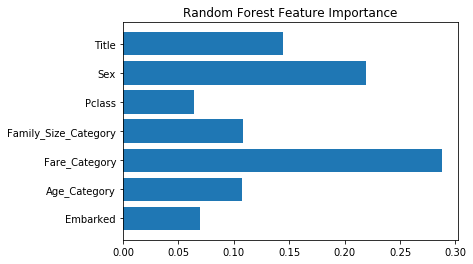

In [42]:
rf_feature_imp = pd.DataFrame({'feature': list(train_data_X),'importance': rf.feature_importances_}).sort_values('importance', ascending= False)
rf_feature_importance = rf_feature_imp['importance'] 
rf_important_idx = np.where(rf_feature_importance)[0]
pos = np.arange(rf_important_idx.shape[0]) + .5
plt.barh(pos, rf_feature_importance[rf_important_idx][::-1])
plt.yticks(pos, rf_feature_imp['feature'][::-1])
plt.title('Random Forest Feature Importance')

### Gradient Boosting 

In [44]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=500, random_state = 0)
gb.fit(train_data_X, train_data_Y)
Y_pred = gb.predict(test_data_X)
gb_acc = accuracy_score(test_data_Y, Y_pred)
gb_acc

0.8430493273542601

As for Radom Forest, we can also plot the feature importance for gradient boosting.

Text(0.5,1,'Gradient Boosting Feature Importance')

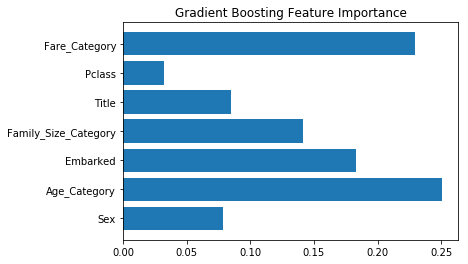

In [45]:
gb_feature_imp = pd.DataFrame({'feature': list(train_data_X),'importance': gb.feature_importances_}).sort_values('importance', ascending=False)
gb_feature_importance = gb_feature_imp['importance'] 
gb_important_idx = np.where(gb_feature_importance)[0]
pos = np.arange(gb_important_idx.shape[0]) + .5
plt.barh(pos, gb_feature_importance[gb_important_idx][::-1])
plt.yticks(pos, gb_feature_imp['feature'][::-1])
plt.title('Gradient Boosting Feature Importance')

We can see that this plot is quite different from the feature importance plot for random forest.

### Summary 

At last, we summarize the models and rank them according to their performance. We can see that decision tree, random forest and gradient boosting give the same highest accuracy. However, we prefer to use random forest and gradient boosting than decision tree since they are less likely to overfit. 

In [46]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'Naive Bayes', 'Perceptron', 'SVM', 'Decision Tree', 'Random Forest', 'Gradient Boosting'],
    'Accuracy Score': [lr_acc, knn_acc, nb_acc, pc_acc, svm_acc, dt_acc, rf_acc, gb_acc]})
models.sort_values(by='Accuracy', ascending=False)

,Accuracy Score,Model
5,0.843049,Decision Tree
6,0.843049,Random Forest
7,0.843049,Gradient Boosting
1,0.829596,KNN
4,0.816143,SVM
0,0.811659,Logistic Regression
2,0.789238,Naive Bayes
3,0.780269,Perceptron


## Conclusion

In this project, we use machine learning algorithms to predict survival for each passenger on Titanic, based on features like sex, age, fare, etc. We consider several models such as logistic regression, kNN, perceptron, SVM, decision tree, neural network, random forest, and gradient boosting. Among these models, decision trees, random forest and gradient boosting perform the best, achieving an accuracy of 84.3%. However, we would prefer random forest and gradient boosting than decision tree since the first two models are less likely to overfit.